# Tema d'esame del 7 luglio 2025

 * si generino cinque punti $(x_i,y_i)$ con le coordinate $x$ equamente distanziate fra 1 e 7, che seguano l'andamento $y_i=\varphi(x_i,\theta) + \varepsilon_i$, dove la funzione $\varphi(x, \theta)$ è una curva esponenziale decrescente con $\lambda=-0.2$ e con i numeri $\varepsilon_i$ distribuiti secondo una distribuzione di densità di probabilità Gaussiana centrata in zero con varianza 2.
 * Si disegnino i punti generati sovrapposti all'andamento della funzione.

In [1]:
import numpy as np
from lib import expo, rand_TCL_ms
from lib_integral import integral, calc_integral
import matplotlib.pyplot as plt

lam = -0.33
y_sigma = 0.2

# points generation
x_coord = np.linspace (1, 7, 5)
y_coord = expo (x_coord, lam) + [rand_TCL_ms (0, y_sigma) for i in range (5)]

print (x_coord)
print (y_coord)



[1.  2.5 4.  5.5 7. ]
[ 0.47158417  0.37606065  0.43885394  0.20067937 -0.22146828]


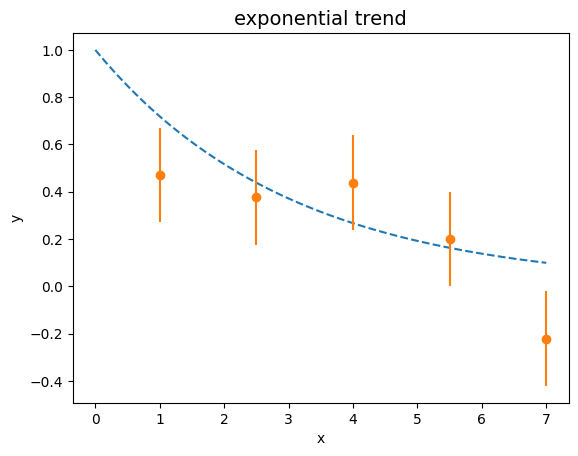

In [2]:
# function drawing

x_func = np.linspace (0,7,100)
y_func = expo (x_func, lam)


fig, ax = plt.subplots ()
ax.set_title ('exponential trend', size=14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.plot (x_func, y_func, linestyle='dashed')
ax.errorbar (x_coord, y_coord, xerr = 0.0, yerr = y_sigma, linestyle = 'None', marker = 'o') 
plt.show ()

 * Si esegua il fit dei punti ottenuti con la libreria iMinuit, determinando il valore ottimale di $\theta$ e la sua incertezza, controllando che il fit abbia avuto successo.

In [3]:
# function fitting with the least squared method

from iminuit import Minuit
from iminuit.cost import LeastSquares

# generate a least-squares cost function
least_squares = LeastSquares (x_coord, y_coord, y_sigma, expo)
my_minuit = Minuit (least_squares, lam = 0)  # starting values for m and q
my_minuit.migrad ()  # finds minimum of least_squares function
my_minuit.hesse ()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.587 (χ²/ndof = 1.1)      │              Nfcn = 34               │
│ EDM = 3.72e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ lam  │   -0.40   │   0.13    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────┐
│     │    lam │
├─────┼────────┤
│ lam │ 0.0166 │
└─────┴────────┘

In [4]:
lam_hat = my_minuit.values['lam'] 
lam_hat_sigma = my_minuit.errors['lam']

print ('success of the fit: ', my_minuit.valid)
print (f"Il valore del parametro ottenuto dal fit è: {my_minuit.values['lam']:.2f} con errore {my_minuit.errors['lam']:.2f}")

success of the fit:  True
Il valore del parametro ottenuto dal fit è: -0.40 con errore 0.13


 * si calcoli l'integrale della curva esponenziale nell'intervallo $(1,6)$, utilizzando il parametro ottenuto dal fit, utilizzando il metodo del \textit{hit-or-miss}, determinando anche l'incertezza statistica dell'integrale.

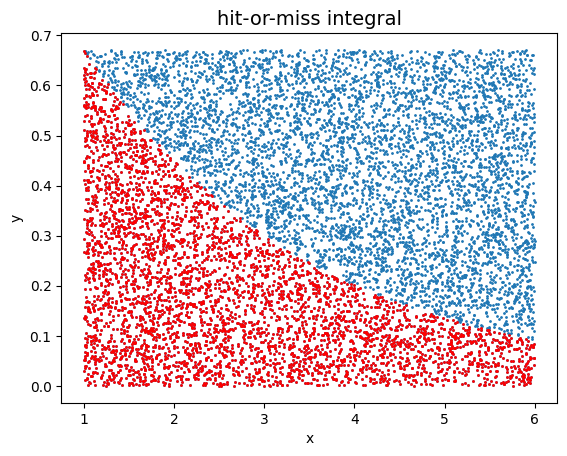

In [5]:
from lib import rand_range

x_min = 1.
x_max = 6.
N_points = 10000
x_points = np.array ([rand_range (x_min, x_max) for i in range (N_points)])
y_points = np.array ([rand_range (0., expo(x_min, my_minuit.values['lam'])) for i in range (N_points)])

# visual representation of the hit-or-miss algorithm in action
fig, ax = plt.subplots ()
ax.set_title ('hit-or-miss integral', size=14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.scatter (x_points, y_points, s=1)
mask = y_points < expo(x_points, my_minuit.values['lam'])
ax.scatter (x_points[mask], y_points[mask], color = 'red', s=1)
plt.show ()

 * Quanto vale l'incertezza aggiuntiva sulla stima dell'integrale dovuta all'errore sul coefficiente $\hat{\theta}$?

In [6]:
# calculation of the integral

N_sotto = 0
for x,y in zip (x_points, y_points):
    if (y<expo (x, my_minuit.values['lam'])) : N_sotto += 1
        
prob = (N_sotto / N_points)
area = (x_max - x_min) * expo (x_min, my_minuit.values['lam'])
result = area * prob
varianza = area **2 * prob * (1-prob) / N_points
errore = np.sqrt (varianza)

print (f"Il risultato dell'integrale è {result:.2f}, con errore {errore:.2f}")

Il risultato dell'integrale è 1.46, con errore 0.02


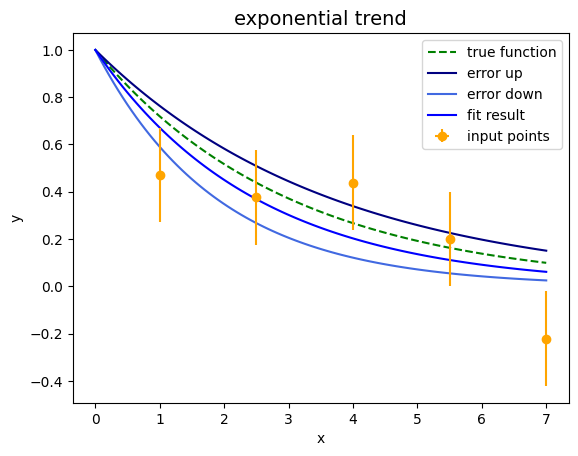

In [7]:
func_up     = lambda x : expo (x, my_minuit.values['lam'] + my_minuit.errors['lam'])
func_center = lambda x : expo (x, my_minuit.values['lam'])
func_down   = lambda x : expo (x, my_minuit.values['lam'] - my_minuit.errors['lam'])

# visualisation of the change in the functional shape 
# when considering the uncertainty on the theta parameter
x_func = np.linspace (0,7,100)
y_func = expo (x_func, lam)

y_func_up     = np.array ([func_up (x) for x in x_func])
y_func_down   = np.array ([func_down (x) for x in x_func])
y_func_center = np.array ([func_center (x) for x in x_func])

fig, ax = plt.subplots ()
ax.set_title ('exponential trend', size=14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.plot (x_func, y_func,        linestyle='dashed', color = 'green', label = 'true function')
ax.plot (x_func, y_func_up,     color = 'navy',                     label = 'error up')
ax.plot (x_func, y_func_down,   color = 'royalblue',                label = 'error down')
ax.plot (x_func, y_func_center, color = 'blue',                     label = 'fit result')
ax.errorbar (x_coord, y_coord, xerr = 0.0, yerr = y_sigma, linestyle = 'None', color = 'orange', marker = 'o', label='input points') 
ax.legend ()
plt.show ()

In [8]:
# calculation of the additional uncertainty, by using the same sample of pseudo-random numbers
# in order not to suffer from statistical uncertainty in the comparison

y_max = max (func_up (x_min), func_center (x_min), func_down (x_min))
x_points = np.array ([rand_range (x_min, x_max) for i in range (N_points)])
y_points = np.array ([rand_range (0., y_max) for i in range (N_points)])

# calculation of the integral
N_sotto_up     = 0
N_sotto_center = 0
N_sotto_down   = 0

for x,y in zip (x_points, y_points):
    if (y < func_up (x))     : N_sotto_up += 1
    if (y < func_center (x)) : N_sotto_center += 1
    if (y < func_down (x))   : N_sotto_down += 1

integral_before = calc_integral (N_points, N_sotto, (x_max - x_min) * expo (x_min, my_minuit.values['lam']))
integral_up = calc_integral (N_points, N_sotto_up, (x_max - x_min) * y_max)
integral_down = calc_integral (N_points, N_sotto_down, (x_max - x_min) * y_max)
integral_center = calc_integral (N_points, N_sotto_center, (x_max - x_min) * y_max)

print (f"Il risultato dell'integrale è {integral_center[0]:.2f}, con errore {integral_center[1]:.2f}")
print (f"Il risultato dell'integrale con errore up è {integral_up[0]:.2f}, con errore {integral_up[1]:.2f}")
print (f"Il risultato dell'integrale con errore down è {integral_down[0]:.2f}, con errore {integral_down[1]:.2f}")

syst = np.abs (0.5 * (integral_up[0] - integral_down[0]))
print (f"L'incertezza sistematica dovuta all'errore sul parametro è: {syst:.2f}")


Il risultato dell'integrale è 1.45, con errore 0.02
Il risultato dell'integrale con errore up è 2.07, con errore 0.02
Il risultato dell'integrale con errore down è 1.02, con errore 0.02
L'incertezza sistematica dovuta all'errore sul parametro è: 0.53


In [9]:
# calcolo alternativo, rigenerando i toy experiment per ogni calcolo dell'integrale:
# in questo caso la differenza fra i risultati up e down è parzialmente dovuta
# all'incertezza statistica nel calcolo

result_center = integral (func_center, x_min, x_max, N_points)
result_up = integral (func_up, x_min, x_max, N_points)
result_down = integral (func_down, x_min, x_max, N_points)

print (f"Il risultato dell'integrale è {result_center[0]:.2f}, con errore {result_center[1]:.2f}")
print (f"Il risultato dell'integrale con errore up è {result_up[0]:.2f}, con errore {result_up[1]:.2f}")
print (f"Il risultato dell'integrale con errore down è {result_down[0]:.2f}, con errore {result_down[1]:.2f}")


Il risultato dell'integrale è 1.45, con errore 0.02
Il risultato dell'integrale con errore up è 2.09, con errore 0.02
Il risultato dell'integrale con errore down è 1.06, con errore 0.01


In [10]:
diff = np.abs (0.5 * (result_up[0] - result_down[0]))
diff_stats_variance = result_up[1]**2 + result_down[1]**2
syst_2_squared = diff**2 - diff_stats_variance
syst_2 = np.sqrt (syst_2_squared)
print (f"L'incertezza sistematica dovuta all'errore sul parametro (secondo metodo) è: {syst_2:.2f}")

L'incertezza sistematica dovuta all'errore sul parametro (secondo metodo) è: 0.52


calcolo alternativo, generando molti toy per ottenere la distribuzione di $\hat{\lambda}$

In [11]:
N_toys = 1000

lams = []
integrals = []
integral_sigmas = []

for i_toy in range (N_toys):
    y_coord = expo (x_coord, lam) + [rand_TCL_ms (0, y_sigma) for i in range (5)]
    least_squares = LeastSquares (x_coord, y_coord, y_sigma, expo)
    my_minuit = Minuit (least_squares, lam = 0)  # starting values for m and q
    my_minuit.migrad ()  # finds minimum of least_squares function
    my_minuit.hesse ()   # accurately computes uncertainties
    if not my_minuit.valid : continue 
    func = lambda x : expo (x, my_minuit.values['lam'])
    lams.append (my_minuit.values['lam'])
    result = integral (func, x_min, x_max, N_points)
    integrals.append (result[0])
    integral_sigmas.append (result[1])

print ('done')

    
# genera un set di punti
# fai il fit
# calcola l'integrale e salvalo in una collezione

done


L'incertezza sistematica dovuta all'errore sul parametro (secondo metodo) è: 0.49


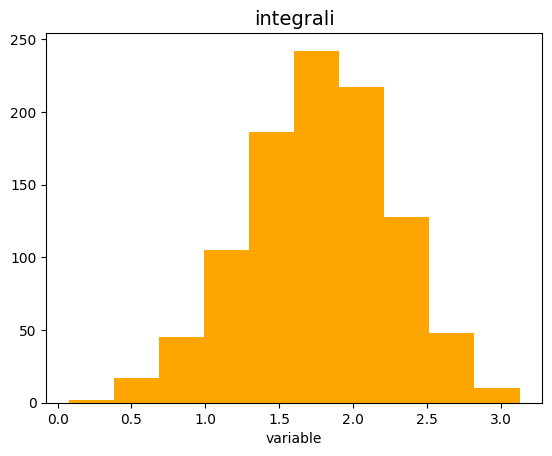

In [12]:
import statistics 
media_integrals = statistics.mean (integrals)
sigma_integrals = statistics.stdev (integrals)
syst_3 = np.sqrt (sigma_integrals**2 - statistics.mean (integral_sigmas)**2)
print (f"L'incertezza sistematica dovuta all'errore sul parametro (secondo metodo) è: {syst_3:.2f}")

fig, ax = plt.subplots ()

ax.set_title ('integrali', size=14)
ax.set_xlabel('variable')
ax.hist (integrals,
            color = 'orange',
           )
plt.show ()



Risoluzione analitica con la propagazione delle incertezze, versione 1:

$\delta_I = \left|\frac{dI(\lambda)}{d\lambda}\delta_{\lambda}\right|$

$ I(\lambda) = \int_{x_1}^{x_2} e^{-\lambda{}x}dx=\frac{1}{\lambda}(e^{-\lambda{}x_1} - e^{-\lambda{}x_2})$

$\delta_I = \left| \frac{1}{\lambda} (-x_1 e^{-\lambda{}x_1}  + x_2 e^{-\lambda{}x_2}) - \frac{1}{\lambda{}^2} ( e^{-\lambda{}x_1} - e^{-\lambda{}x_2})\right| \cdot |\delta_{\lambda} |$

In [13]:
lam_hat *= -1
print (lam_hat)
print (lam_hat_sigma)
syst_4 = lam_hat_sigma \
         * np.abs (
                (x_max * np.exp (-lam_hat * x_max) - x_min * np.exp (-lam_hat * x_min)) / lam_hat 
              - (np.exp (-lam_hat * x_min) - np.exp (-lam_hat * x_max)) / (lam_hat**2)
           )
print (f"L'incertezza sistematica dovuta all'errore sul parametro (quarto metodo) è: {syst_4:.2f}")


0.3990917022753839
L'incertezza sistematica dovuta all'errore sul parametro (quarto metodo) è: 0.51
0.12874765257404303


Risoluzione analitica con la propagazione delle incertezze, versione 2:

$\delta_I = \left|\frac{dI(\lambda)}{d\lambda}\delta_{\lambda}\right|$

$ I(\lambda) = \int_{x_1}^{x_2} e^{\lambda{}x}dx=\frac{1}{\lambda}(e^{\lambda{}x_2} - e^{\lambda{}x_1})$

$\delta_I = \left| \frac{1}{\lambda} (-x_1 e^{\lambda{}x_1}  + x_2 e^{\lambda{}x_2}) - \frac{1}{\lambda{}^2} ( e^{\lambda{}x_2} - e^{\lambda{}x_1})\right| \cdot |\delta_{\lambda} |$

In [16]:
lam_hat *= -1
print (lam_hat)
print (lam_hat_sigma)
syst_5 = lam_hat_sigma \
         * np.abs ( 
               (x_max * np.exp (lam_hat * x_max) - x_min * np.exp (lam_hat * x_min))/lam_hat 
             - (np.exp (lam_hat * x_max) - np.exp (lam_hat * x_min))/(lam_hat**2)
           )
print (f"L'incertezza sistematica dovuta all'errore sul parametro (quarto metodo bis) è: {syst_5:.2f}")


-0.3990917022753839
0.12874765257404303
L'incertezza sistematica dovuta all'errore sul parametro (quarto metodo bis) è: 0.51
